In [1]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
import matplotlib.pyplot as plt
#import matplotlib.pylab as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

### StatsModels 패키지는 ARMA 모형 분석 및 추정을 위해 다음과 같은 클래스를 제공한다.

#### 클래스 이름	용도
* ArmaProcess	미리 정해진 계수를 가진 ARMA 모형
* ARMA	주어진 자료에서 계수를 추정하기 위한 ARMA 모형
* ARMAResults	주어진 자료에서 추정된 ARMA 모형

In [3]:
ar = np.r_[1, -0.75, 0.25] 
ma = np.r_[1, 0.65, 0.35]
m = sm.tsa.ArmaProcess(ar, ma)


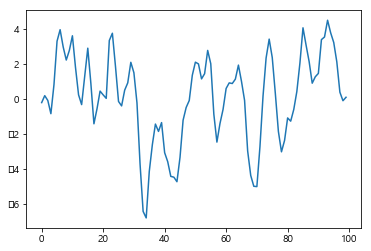

In [4]:
np.random.seed(12345)
x = m.generate_sample(100)
plt.plot(x)
plt.show()

# 특성 분석
## 메서드, 속성 이름	용도
* isstationary	모형 안정성(stability)
* isinvertible	모형 가역성(invertibility)
* acovf()	이론적인 자기 공분산(autocovariance) 값
* acf()	이론적인 자기 상관계수(autocorrelation) 값
* pacf()	이론적인 자기 편상관계수(partial autocorrelation) 값

In [5]:
m.isstationary

True

In [6]:
m.isinvertible

True

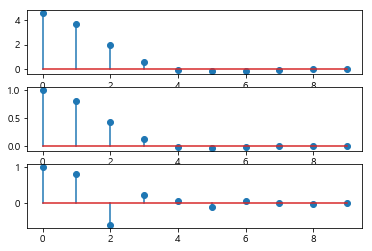

In [7]:
plt.subplot(311)
plt.stem(m.acovf(10))
plt.subplot(312)
plt.stem(m.acf(10))
plt.subplot(313)
plt.stem(m.pacf(10))
plt.show()

### ARMA 및 ARMAResults 클래스 사용법

* ARMA 및 ARMAResults 클래스는 미리 계수가 정해진 이론적 모형이 아니라 주어진 자료로부터 모형을 추정할 때 사용하는 클래스이다. 사용 방법은 다음과 같다.

* 우선 주어진 자료와 차수를 입력변수로 ARMA 객체를 생성하고 ARMA.fit() 메서드를 사용하여 추정결과를 ARMAResults 클래스 객체로 출력한다.

In [8]:
m2 = sm.tsa.ARMA(x, (2, 2))
r = m2.fit(disp=False)
print(r.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(2, 2)   Log Likelihood                -144.231
Method:                       css-mle   S.D. of innovations              1.011
Date:                Tue, 01 Oct 2019   AIC                            300.462
Time:                        16:54:58   BIC                            316.093
Sample:                             0   HQIC                           306.788
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1152      0.533      0.216      0.829      -0.929       1.159
ar.L1.y        0.6593      0.171      3.864      0.000       0.325       0.994
ar.L2.y       -0.0966      0.159     -0.606      0.5

## ARMAResults 클래스 객체는 추정 결과 정보를 다음과 같은 속성값에 나누어 저장한다.

### 속성/메서드 이름	용도
* model	추정 자료와 모형 차수 등을 가진 ARMA 클래스 객체
* k_ar	AR 차수
* k_ma	MA 차수
* arparams	추정된 AR 계수
* maparams	추정된 MA 계수
* params	추정된 전체 계수 (trend 계수 포함)
* bse	추정된 전체 계수의 표준 오차
* tvalues	추정된 계수의 t statistics
* pvalues	추정된 계수의 t statistics에 대한 p value
* conf_int()	추정된 계수의 신뢰구간 계산
* llf	Log Likelihood 값
* aic	AIC 값
* bic	BIC 값
* hqic	HQIC 값
* fittedvalues	추정 모형에 의한 예측값
* resid	추정 모형에 의한 잔차항(Residuals)
* sigma2	추정 모형에 의한 잔차항의 분산

In [9]:
r.arparams

array([ 0.65927037, -0.09655681])

In [10]:
r.maparams

array([0.84051332, 0.50663558])

In [11]:
r.params

array([ 0.11519285,  0.65927037, -0.09655681,  0.84051332,  0.50663558])

In [12]:
r.bse

array([0.53261667, 0.1706156 , 0.15928806, 0.14462624, 0.1091988 ])

In [13]:
r.tvalues

array([ 0.21627722,  3.86406857, -0.60617734,  5.81162401,  4.63957075])

In [14]:
r.pvalues

array([8.29235394e-01, 2.03787457e-04, 5.45842724e-01, 8.23426471e-08,
       1.11581035e-05])

In [15]:
r.conf_int()

array([[-0.92871664,  1.15910235],
       [ 0.32486994,  0.9936708 ],
       [-0.40875568,  0.21564205],
       [ 0.5570511 ,  1.12397554],
       [ 0.29260986,  0.7206613 ]])

In [16]:
r.llf

-144.231013370284

In [17]:
r.aic

300.462026740568

In [18]:
r.bic

316.0930478564965

In [19]:
r.hqic

306.7881822502628

In [20]:
r.sigma2

1.0211629257247028

In [21]:
r.fittedvalues

array([ 0.11519285, -0.15507023,  0.40740454, -0.32549478, -1.12728962,
        2.01300422,  4.15862958,  2.80999897,  1.66196738,  1.78482032,
        2.77478578,  3.36083729,  0.01130115, -0.56145995,  0.13649944,
        2.03773307,  3.15051015, -1.09364646, -2.3788198 ,  1.18675752,
        0.70544446, -0.60327541,  0.35389405,  5.08199183,  2.59672294,
       -0.35486082, -0.40722668, -0.07335297,  0.91412447,  0.91161423,
        2.34109654,  0.729599  , -1.46840028, -4.7296589 , -6.3675437 ,
       -5.00642194, -1.50003781, -1.76064035, -0.92362566, -1.64024794,
       -0.87929321, -3.5241608 , -3.16252236, -3.59388931, -3.82548866,
       -3.8193719 , -1.72632018,  0.25874548, -0.51260488,  0.02249654,
        2.2911678 ,  1.82323762,  1.22221373,  0.64354584,  1.52794679,
        3.19042342,  0.75097736, -2.66935653, -2.12888127,  0.08842867,
       -0.40768756,  1.00974202,  1.03555464,  0.37254598,  1.27416896,
        2.15642869, -0.1134056 , -0.65532912, -3.81881125, -4.16

In [22]:
r.resid

array([-0.31990051,  0.34742284, -0.49173639, -0.51157757,  1.94332065,
        1.28494474, -0.20253075,  0.16241623,  0.56299464,  0.98570795,
        0.83339975, -1.55262607,  0.22777506,  0.24269436,  1.16261459,
        0.86223864, -2.25224722, -0.32030579,  1.82054448, -0.73582412,
       -0.4683285 ,  0.6410327 ,  2.9852196 , -1.32956515, -0.72093615,
        0.21517914,  0.01483055,  0.57788963,  0.00968392,  1.1828491 ,
       -0.84093966, -0.95272088, -2.2342022 , -1.68382759, -0.41675354,
        0.87095734, -1.10859147,  0.3310551 , -0.92510785,  0.29463324,
       -2.18300884, -0.05281829, -1.25213147, -0.86572933, -0.8932689 ,
        0.49223091,  0.51730469, -0.74169631,  0.42619948,  1.33465471,
       -0.1885439 ,  0.17894623, -0.07329842,  0.80103218,  1.24442848,
       -1.17718747, -1.61625255,  0.21061502,  0.73173981, -0.68142306,
        1.01089351, -0.08962733, -0.15087846,  0.76014299,  0.66028717,
       -1.15562496,  0.03412405, -2.3083916 , -0.54260243, -0.81

### ARMAResults 클래스 객체는 다음과 같은 유용한 메서드도 제공한다.

### 메서드 이름	용도
* summary()	추정 결과 요약 문자열
* summary2()	추정 결과 요약 문자열
* forecast()	예측 (자료가 끝난 다음의 미래 예측, 신뢰구간 출력)
* predict()	예측 (자료 내부의 in-sample 예측도 가능)
* plot_predict()	예측 플롯. forecast() 결과를 시각화

In [23]:
r.forecast(20)[0]

array([0.561327  , 0.48980509, 0.31908631, 0.21344241, 0.16027857,
       0.13542987, 0.12418118, 0.11916457, 0.11694341, 0.11596344,
       0.11553185, 0.11534194, 0.11525841, 0.11522168, 0.11520553,
       0.11519843, 0.1151953 , 0.11519393, 0.11519333, 0.11519306])

In [24]:
r.predict(100, 120)

array([0.561327  , 0.48980509, 0.31908631, 0.21344241, 0.16027857,
       0.13542987, 0.12418118, 0.11916457, 0.11694341, 0.11596344,
       0.11553185, 0.11534194, 0.11525841, 0.11522168, 0.11520553,
       0.11519843, 0.1151953 , 0.11519393, 0.11519333, 0.11519306,
       0.11519295])

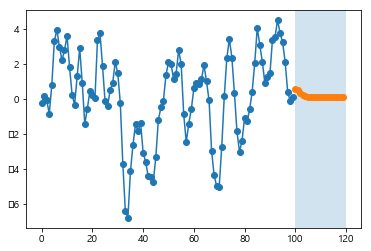

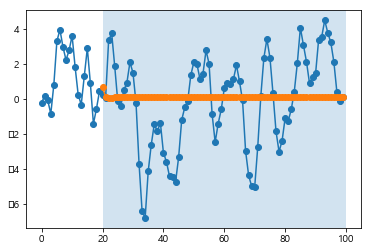

In [25]:
plt.figure(1)
plt.plot(r.model.endog, marker='o')
#plt.hold(True)
plt.plot(np.r_[[np.nan] * 100, r.forecast(20)[0]], marker='o'); plt.axvspan(xmin=100, xmax=120, alpha=0.2)
plt.figure(2)
plt.plot(r.model.endog, marker='o')
#plt.hold(True)
plt.plot(np.r_[[np.nan] * 20, r.predict(20, dynamic=True)], marker='o'); plt.axvspan(xmin=20, xmax=100, alpha=0.2)
plt.show()